In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.io.img_tiles as cimgt
from sklearn.neighbors import KNeighborsRegressor
import AISMapPlot as aismap
import pickle

In [69]:
sectors = [0, 1, 2, 3, 4, 5]
sector_borders = [52.8, 4.8, 6.0, 7.2, 8.6, 9.81]
positions = pd.DataFrame([[52.8, np.nan], [np.nan, 4.8], [np.nan, 6.0], [np.nan, 7.2], [np.nan, 8.6], [np.nan, 9.81]],
                         columns = ['Latitude', 'Longitude'])

    
ais_test = []  
for s in sectors:
    ais_test.append(pd.read_pickle('ROT-HAM_test_01min_s%d.pkl' % (s)))

In [70]:
time_loaded = []

for s in sectors:
    time_loaded.append(pickle.load(open('../App/Agents/rot_ham_s%d/model_time.pkl' % (s), 'rb')))

In [71]:
predicts = []
for s in sectors:
    predicts.append(time_loaded[s].predict(ais_test[s][['Latitude', 'Longitude', 'COG', 'SOG']]))

In [72]:
predicts_diffs = []
for s in sectors:
     predicts_diffs.append(predicts[s] - ais_test[s]['mins_to_sector_leave'])

In [75]:
predicts_frame = []

for s in sectors:
    predicts_frame.append(pd.DataFrame({'correct': ais_test[s]['mins_to_sector_leave'], 'predicted': predicts[s], 'diff': predicts_diffs[s]}))
    predicts_frame[s]['abs_error'] = predicts_frame[s]['diff'].transform(lambda x: abs(x))
    predicts_frame[s] = predicts_frame[s].sort_values('correct')


In [77]:
predicts_frame[0]['abs_error'].describe()

count    263.000000
mean       9.578162
std       10.262611
min        0.007768
25%        1.956762
50%        5.551993
75%       14.456931
max       46.028932
Name: abs_error, dtype: float64

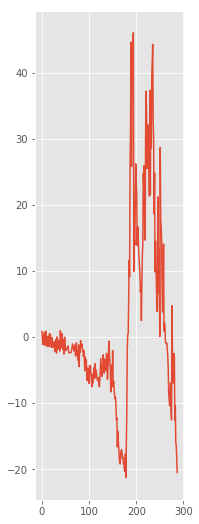

In [84]:
plt.figure(figsize = (2.666, 9))
plt.plot(predicts_frame[0]['correct'], predicts_frame[0]['diff'])
# plt.savefig('../Images/rot_ham_complete_rfr_test.png', dpi = 300, bbox_inches = 'tight')

In [78]:
predicts_frame[1]['abs_error'].describe()

count    172.000000
mean       6.193592
std        3.787891
min        0.116584
25%        2.303011
50%        6.618733
75%        9.406717
max       13.101095
Name: abs_error, dtype: float64

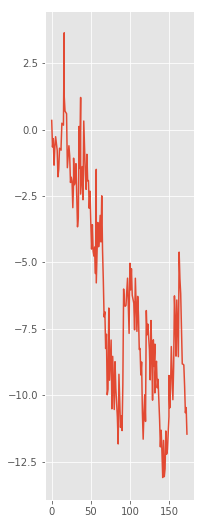

In [85]:
plt.figure(figsize = (2.666, 9))
plt.plot(predicts_frame[1]['correct'], predicts_frame[1]['diff'])
# plt.savefig('../Images/rot_ham_complete_rfr_test.png', dpi = 300, bbox_inches = 'tight')

In [79]:
predicts_frame[2]['abs_error'].describe()

count    181.000000
mean       2.364615
std        2.557433
min        0.008811
25%        0.822640
50%        1.659669
75%        2.593849
max       13.149621
Name: abs_error, dtype: float64

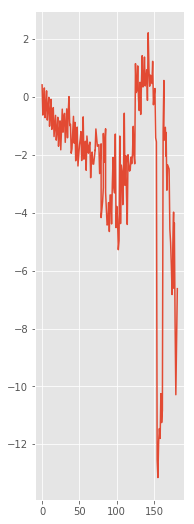

In [86]:
plt.figure(figsize = (2.666, 9))
plt.plot(predicts_frame[2]['correct'], predicts_frame[2]['diff'])
# plt.savefig('../Images/rot_ham_complete_rfr_test.png', dpi = 300, bbox_inches = 'tight')

In [80]:
predicts_frame[3]['abs_error'].describe()

count    185.000000
mean       4.109255
std        4.099120
min        0.019229
25%        1.294851
50%        3.050110
75%        4.813943
max       15.775550
Name: abs_error, dtype: float64

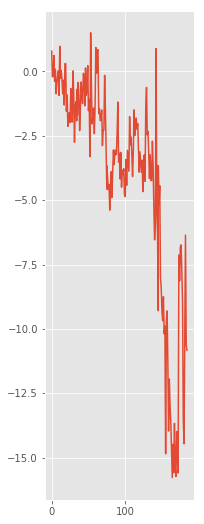

In [87]:
plt.figure(figsize = (2.666, 9))
plt.plot(predicts_frame[3]['correct'], predicts_frame[3]['diff'])
# plt.savefig('../Images/rot_ham_complete_rfr_test.png', dpi = 300, bbox_inches = 'tight')

In [81]:
predicts_frame[4]['abs_error'].describe()

count    241.000000
mean      19.444767
std       26.147861
min        0.127174
25%        3.793232
50%       12.010588
75%       23.797093
max      136.603439
Name: abs_error, dtype: float64

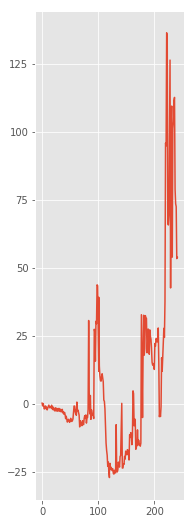

In [88]:
plt.figure(figsize = (2.666, 9))
plt.plot(predicts_frame[4]['correct'], predicts_frame[4]['diff'])
# plt.savefig('../Images/rot_ham_complete_rfr_test.png', dpi = 300, bbox_inches = 'tight')

In [82]:
predicts_frame[5]['abs_error'].describe()

count    304.000000
mean       7.330548
std        6.168460
min        0.046236
25%        1.702929
50%        5.673084
75%       11.736857
max       27.919669
Name: abs_error, dtype: float64

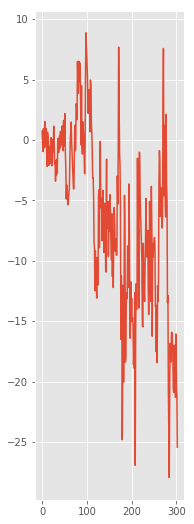

In [89]:
plt.figure(figsize = (2.666, 9))
plt.plot(predicts_frame[5]['correct'], predicts_frame[5]['diff'])
# plt.savefig('../Images/rot_ham_complete_rfr_test.png', dpi = 300, bbox_inches = 'tight')